<a href="https://colab.research.google.com/github/Navyasrimachagiri/Fertilizer_prediction/blob/main/fertilizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Fertilizer_prediction.csv")

In [4]:
print(df.describe())

          Nitrogen   Phosphorus    Potassium           pH     Rainfall  \
count  4513.000000  4513.000000  4513.000000  4513.000000  4513.000000   
mean     95.409927    54.341901    63.595170     6.715267   819.189010   
std      38.060648    16.551991    35.691911     0.625198   251.730813   
min      20.000000    10.000000     5.000000     5.500000   300.000000   
25%      60.000000    40.000000    40.000000     6.000000   600.000000   
50%     105.000000    55.000000    55.000000     6.500000   800.000000   
75%     125.000000    65.000000    75.000000     7.000000  1000.000000   
max     150.000000    90.000000   150.000000     8.500000  1700.000000   

       Temperature  
count  4513.000000  
mean     25.915134  
std       5.897328  
min      10.000000  
25%      20.000000  
50%      25.000000  
75%      30.000000  
max      40.000000  


In [5]:
print(len(df))

4513


In [6]:
print(df.shape[0])

4513


In [7]:
#Checking outliers
from scipy.stats import zscore
any_outliers = (abs(df.select_dtypes(include=['number']).apply(zscore))).any().any()

In [8]:
print(any_outliers)

True


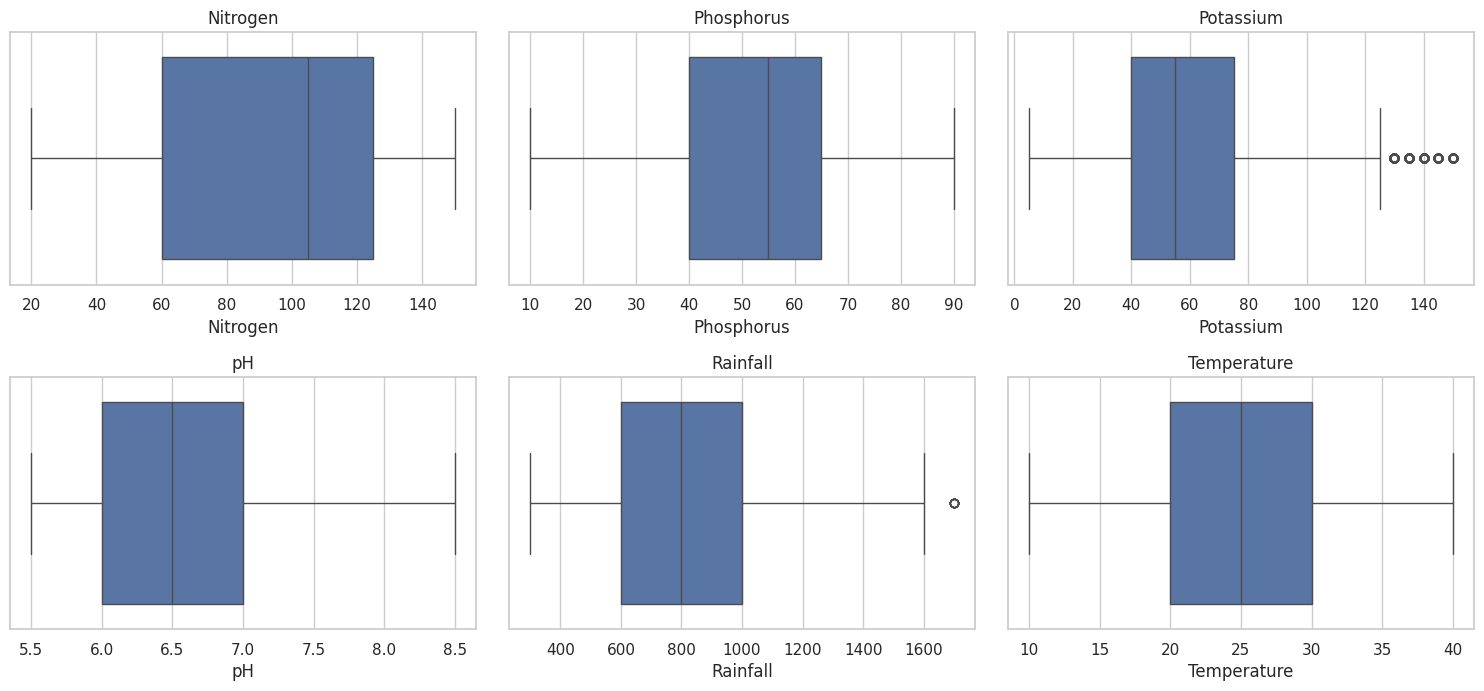

In [9]:
#Showing outlier in BoxPlot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [10]:
#Handling outliers
def handle_outliers(df):
    df_no_outliers = df.copy()
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

    return df_no_outliers


In [11]:
df_no_outliers = handle_outliers(df)

In [12]:
print(df_no_outliers)

     Soil_color  Nitrogen  Phosphorus  Potassium   pH  Rainfall  Temperature  \
0         Black        75          50        100  6.5      1000           20   
1         Black        80          50        100  6.5      1000           20   
2         Black        85          50        100  6.5      1000           20   
3         Black        90          50        100  6.5      1000           20   
4         Black        95          50        100  6.5      1000           20   
...         ...       ...         ...        ...  ...       ...          ...   
4473      Black       130          80        125  7.5      1500           25   
4474      Black       135          80        125  7.5      1500           25   
4475      Black       140          80        125  7.5      1500           25   
4476      Black       145          80        125  7.5      1500           25   
4477      Black       150          80        125  7.5      1500           25   

     Fertilizer  
0          Urea  
1  

In [13]:
print(len(df_no_outliers))

4009


In [14]:
missing_val=df.isnull().sum()

In [15]:
print(missing_val)

Soil_color     0
Nitrogen       0
Phosphorus     0
Potassium      0
pH             0
Rainfall       0
Temperature    0
Fertilizer     0
dtype: int64


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
print(df['Fertilizer'].unique())

['Urea' 'DAP' 'MOP' '10:26:26 NPK' 'SSP' 'Magnesium Sulphate'
 '13:32:26 NPK' '12:32:16 NPK' '50:26:26 NPK' '19:19:19 NPK'
 'Chilated Micronutrient' '18:46:00 NPK' 'Sulphur' '20:20:20 NPK'
 'Ammonium Sulphate' 'Ferrous Sulphate' 'White Potash' '10:10:10 NPK'
 'Hydrated Lime']


<Axes: xlabel='count', ylabel='Fertilizer'>

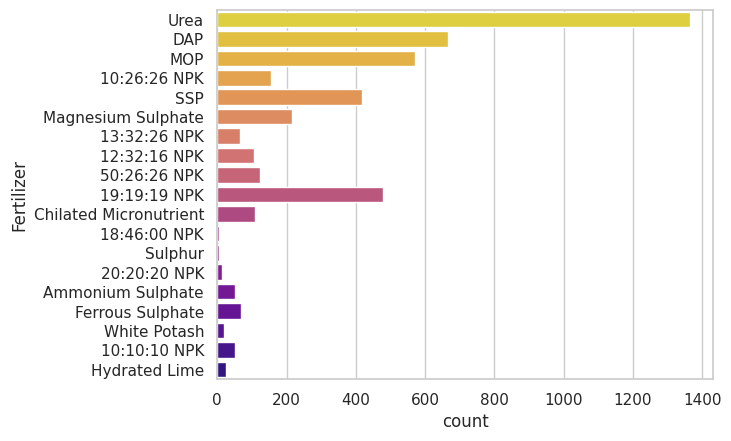

In [19]:
sns.countplot(y='Fertilizer', data=df, hue='Fertilizer', legend=False, palette="plasma_r")

In [21]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Fertilizer'])

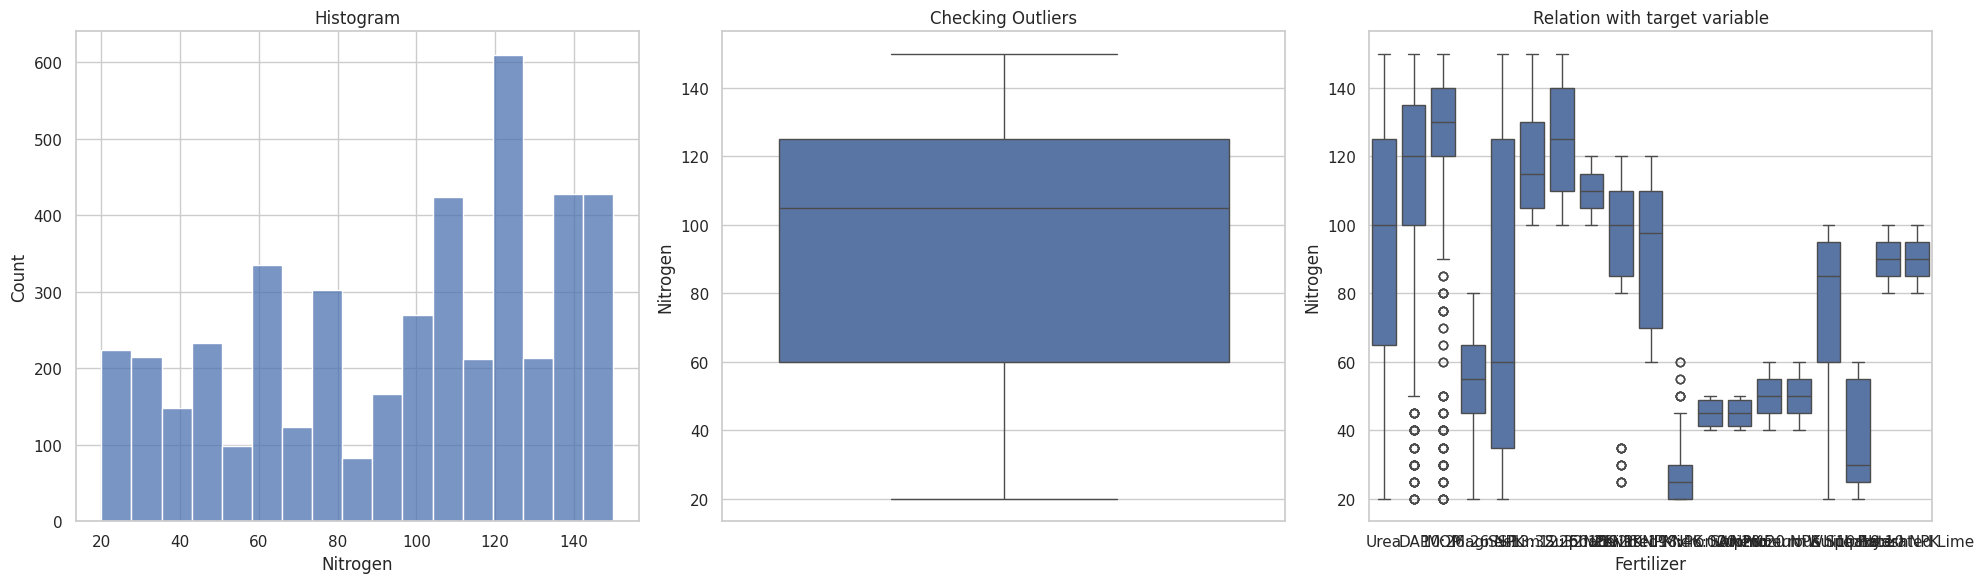

In [22]:
plot_conti(df['Nitrogen'])

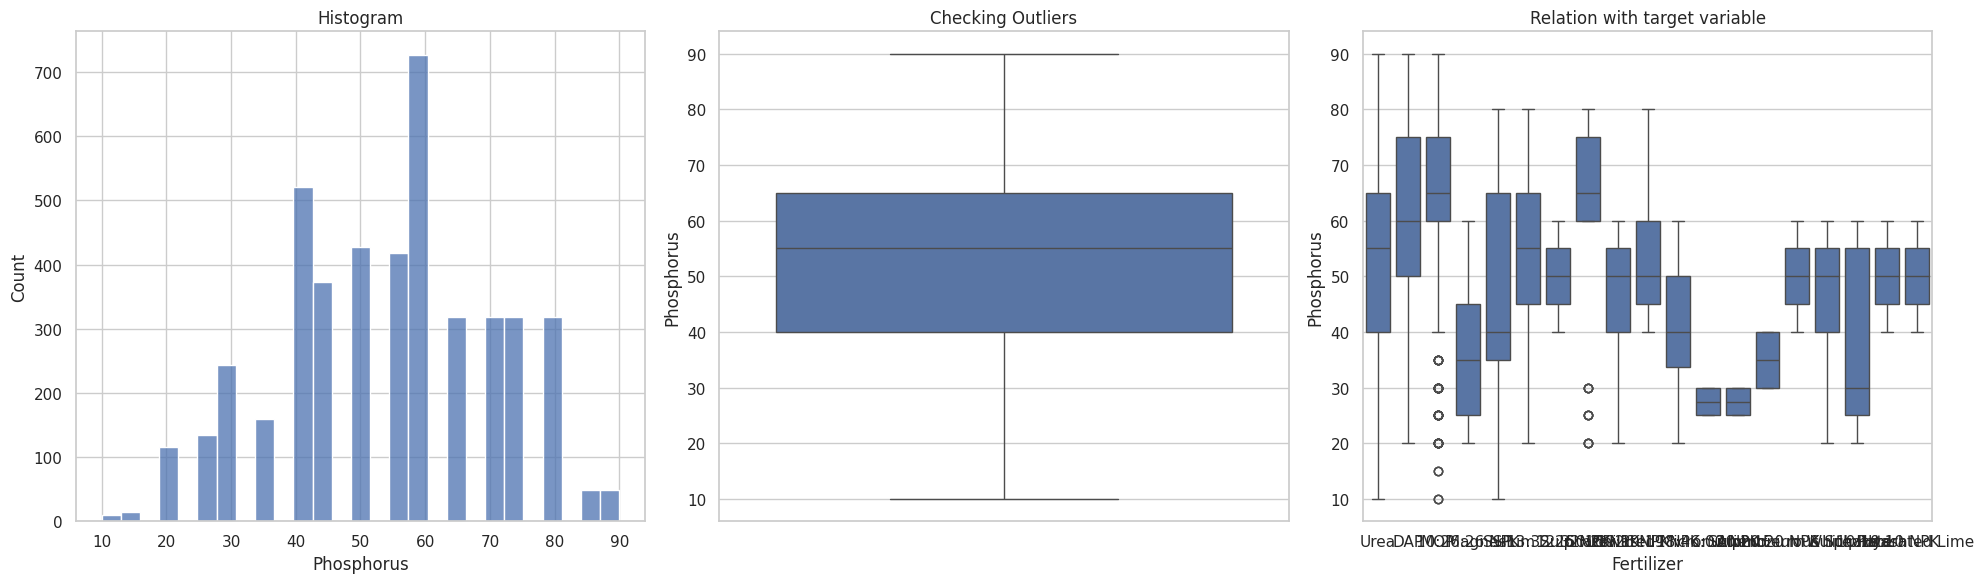

In [23]:
plot_conti(df['Phosphorus'])

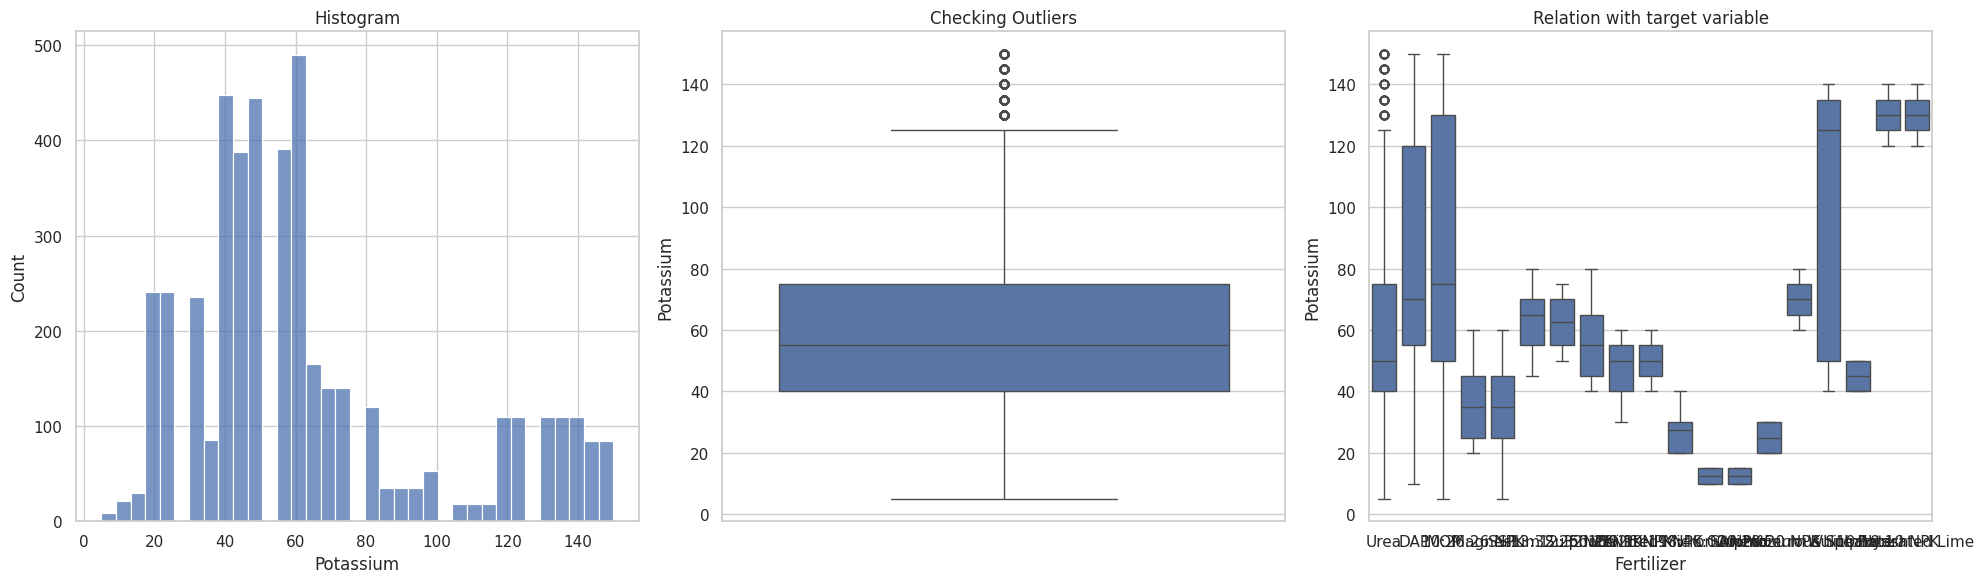

In [24]:
plot_conti(df['Potassium'])

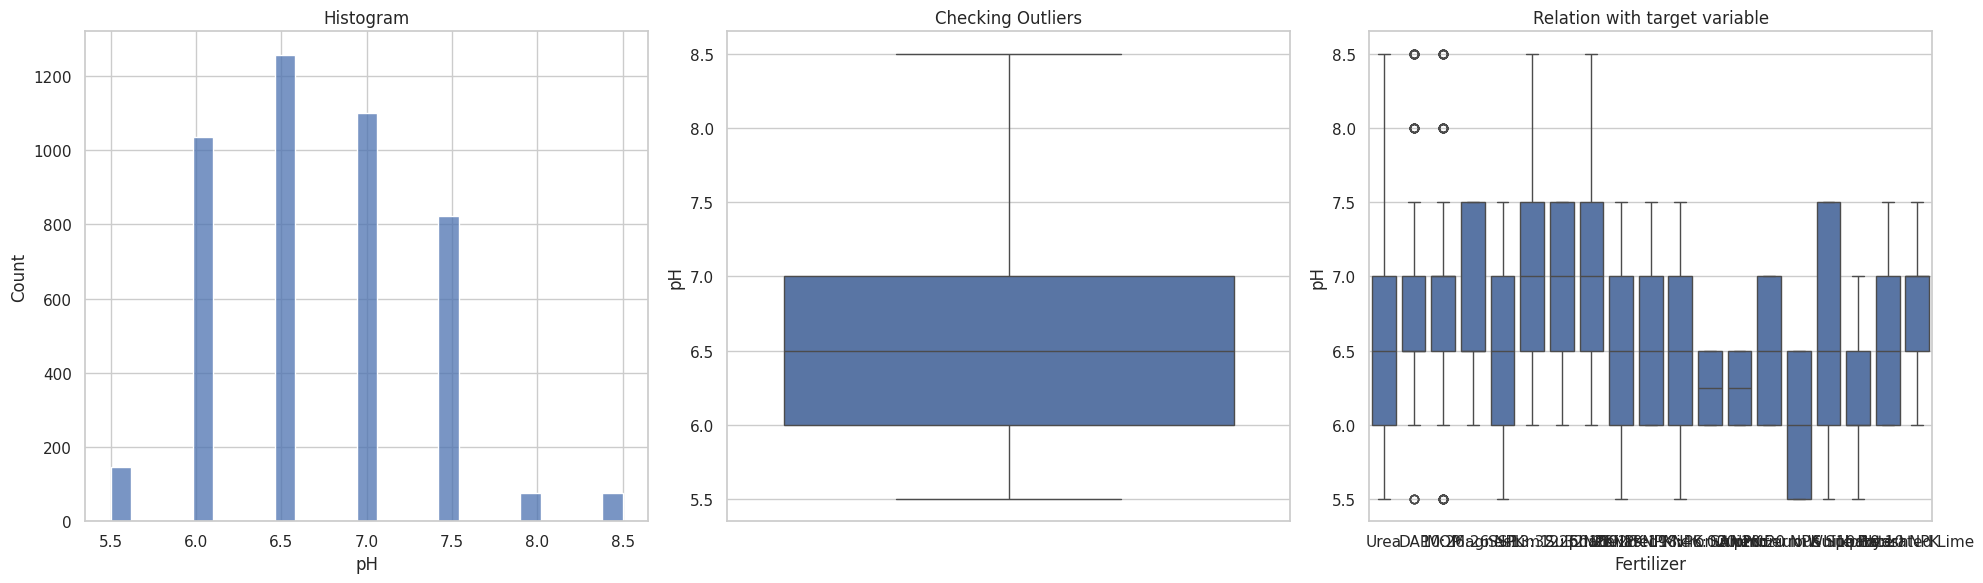

In [25]:
plot_conti(df['pH'])

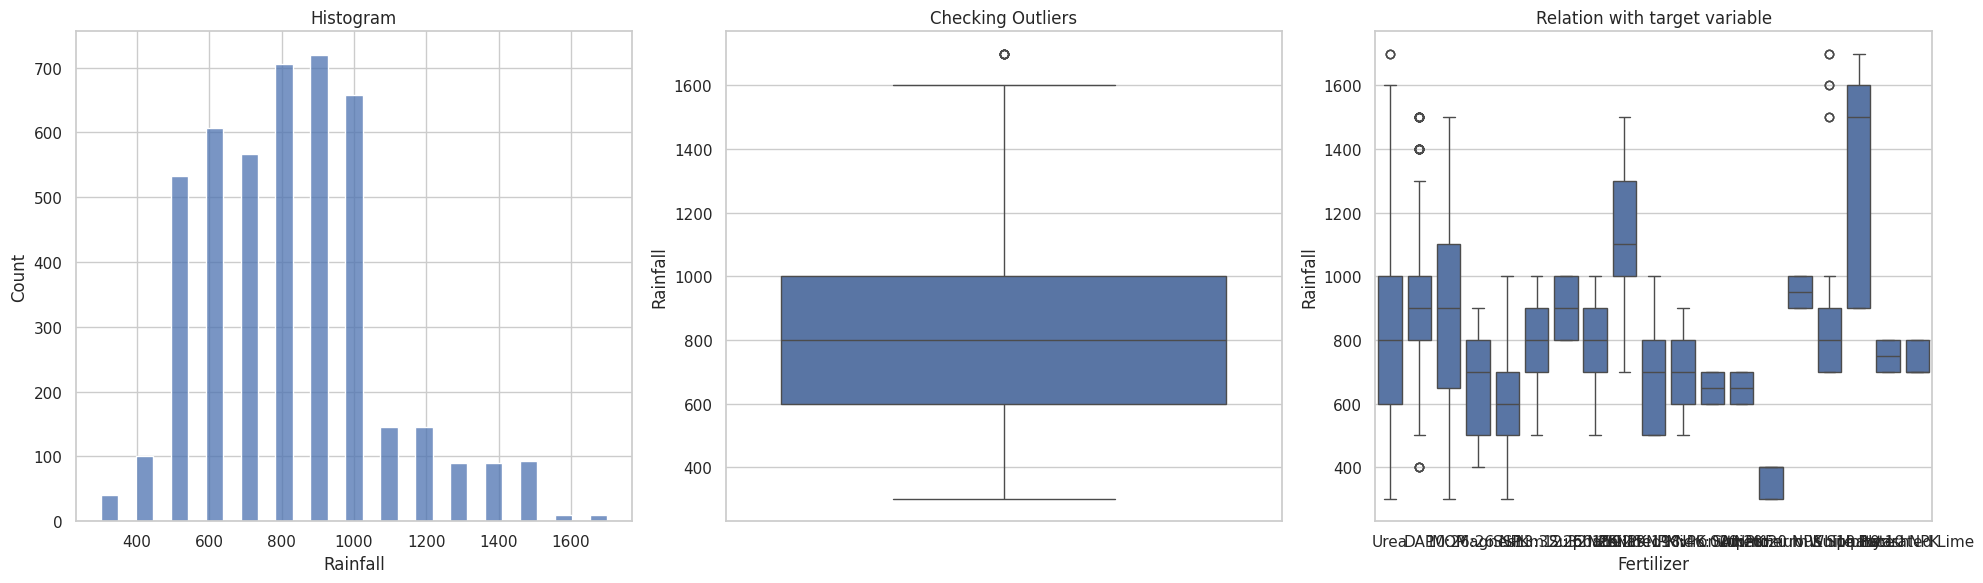

In [26]:
plot_conti(df['Rainfall'])

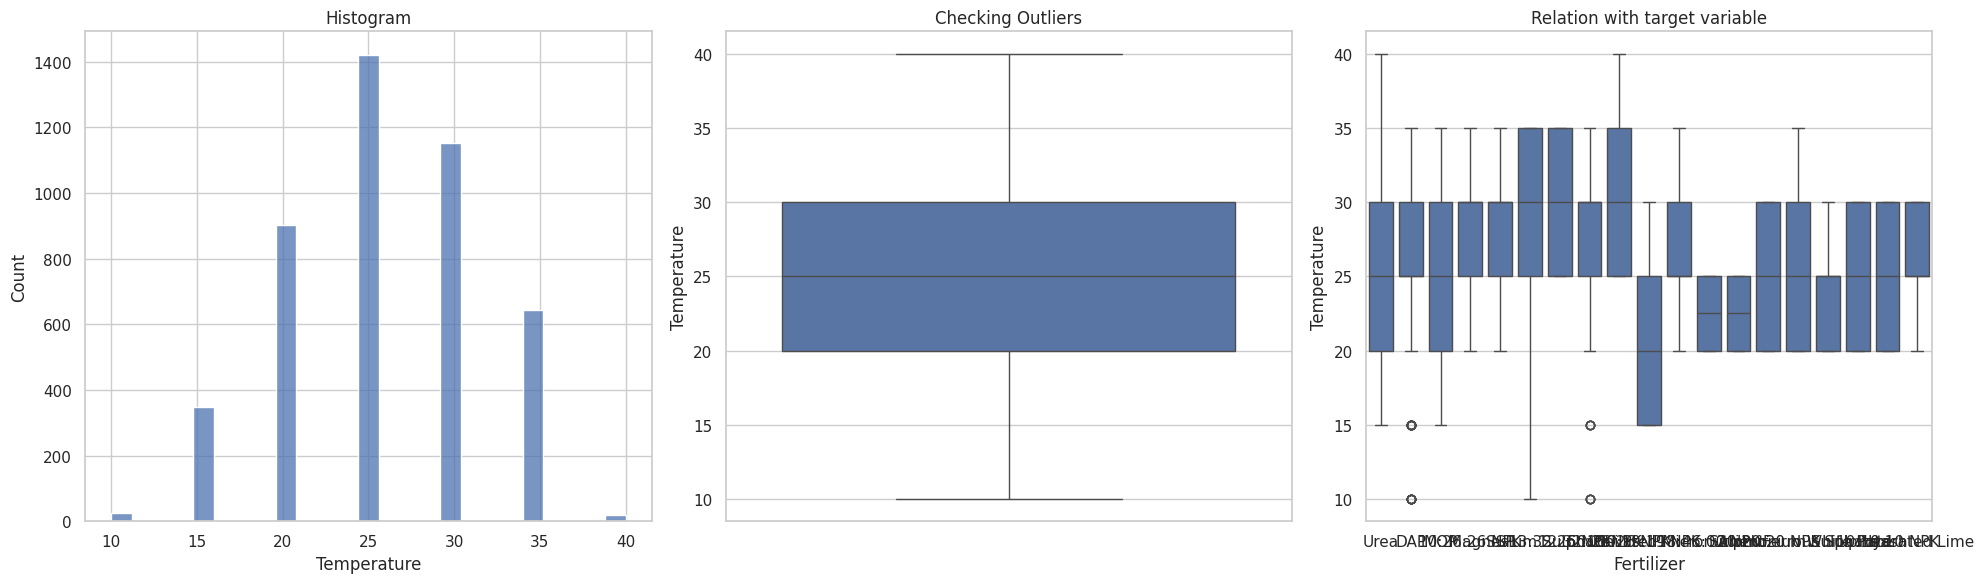

In [27]:
plot_conti(df['Temperature'])

In [28]:
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer'], ax=axes[1])

In [29]:
print(df['Soil_color'].unique())

['Black' 'Red ' 'Medium Brown' 'Dark Brown' 'Red' 'Light Brown'
 'Reddish Brown']


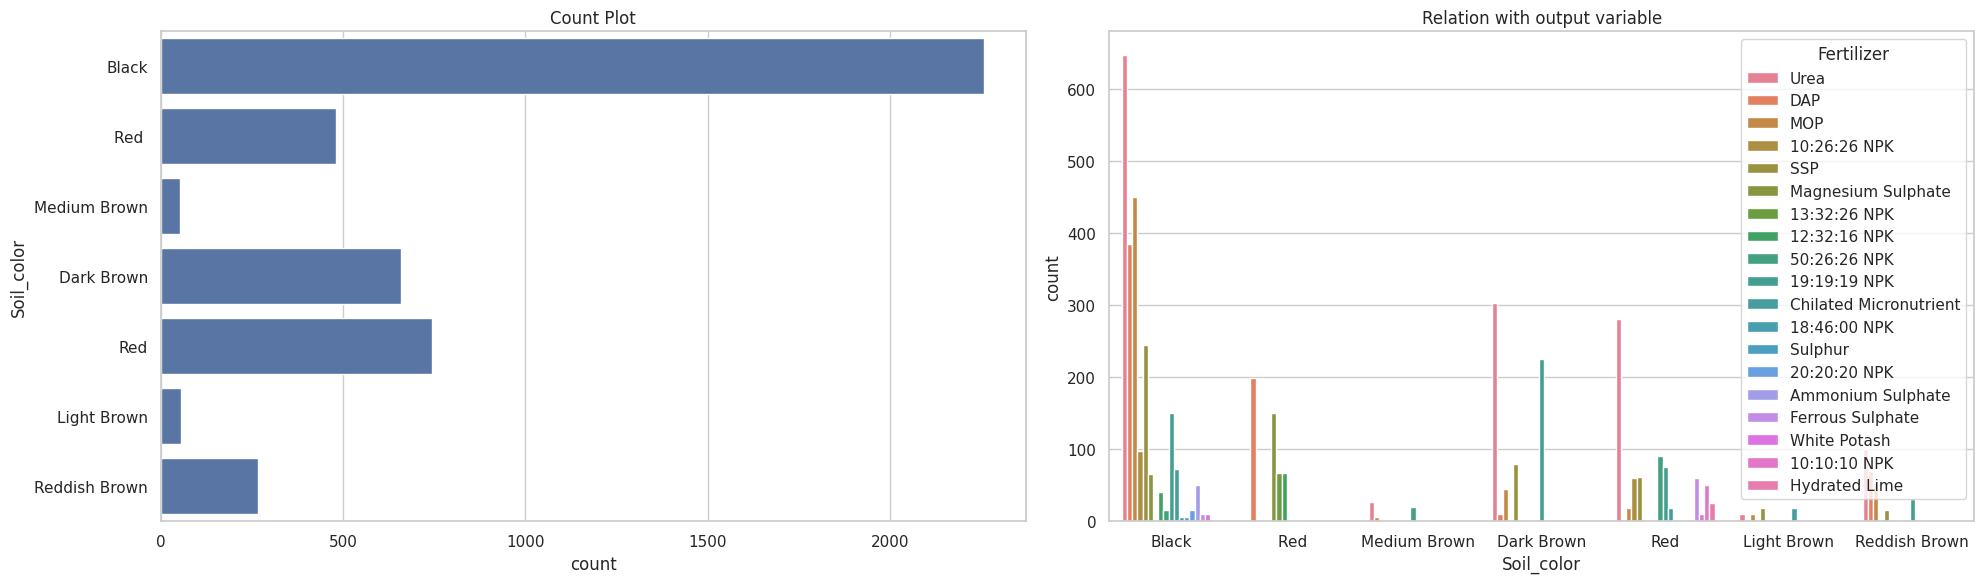

In [30]:
plot_cato(df['Soil_color'])

In [31]:
!pip install dython
from dython import nominal

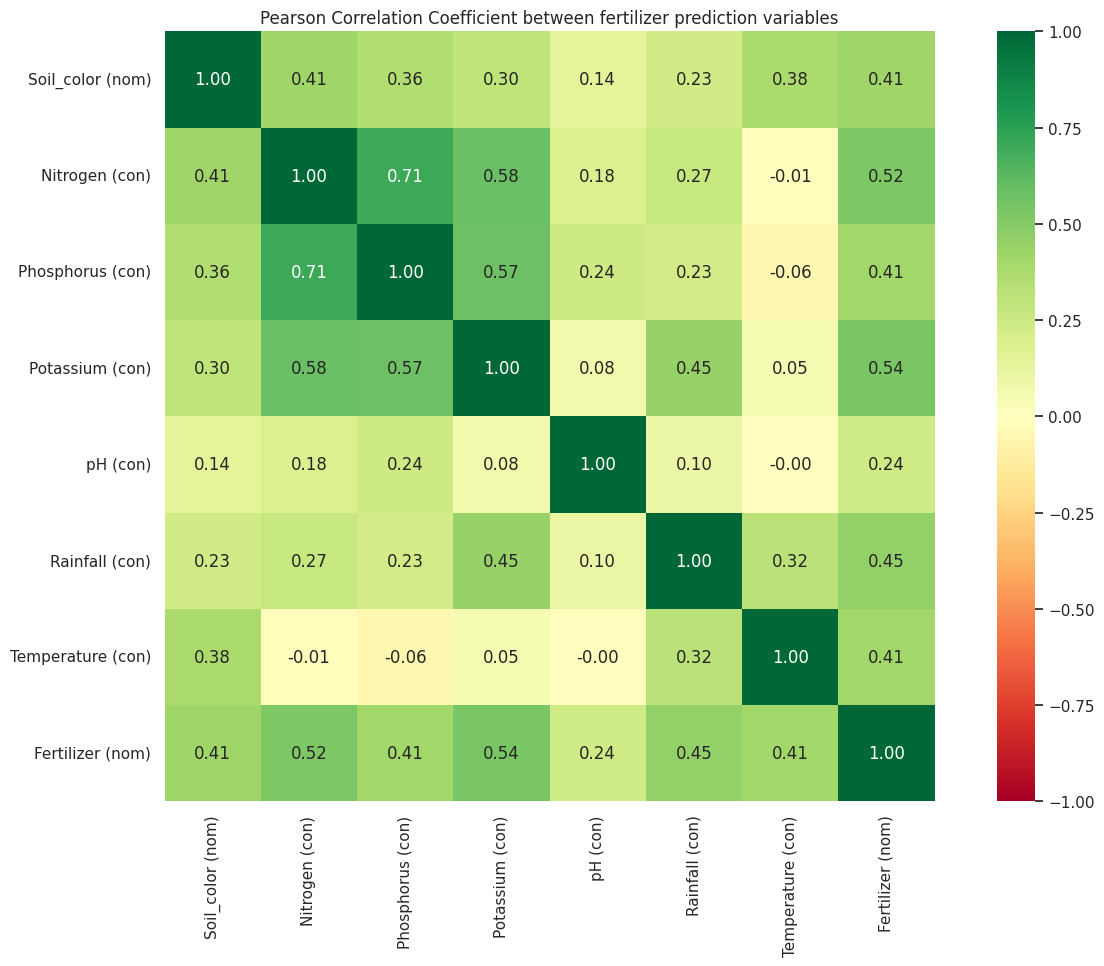

{'corr':                    Soil_color (nom)  Nitrogen (con)  Phosphorus (con)  \
 Soil_color (nom)           1.000000        0.414838          0.358656   
 Nitrogen (con)             0.414838        1.000000          0.709539   
 Phosphorus (con)           0.358656        0.709539          1.000000   
 Potassium (con)            0.298611        0.584315          0.573970   
 pH (con)                   0.139011        0.182850          0.244945   
 Rainfall (con)             0.226572        0.269364          0.225453   
 Temperature (con)          0.382465       -0.010213         -0.055303   
 Fertilizer (nom)           0.414635        0.524288          0.409102   
 
                    Potassium (con)  pH (con)  Rainfall (con)  \
 Soil_color (nom)          0.298611  0.139011        0.226572   
 Nitrogen (con)            0.584315  0.182850        0.269364   
 Phosphorus (con)          0.573970  0.244945        0.225453   
 Potassium (con)           1.000000  0.075110        0.445671   

In [32]:
nominal.associations(df,
                     figsize=(16, 10),
                     mark_columns=True, title="Pearson Correlation Coefficient between fertilizer prediction variables",
                     cmap='RdYlGn')

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('/content/drive/MyDrive/Fertilizer_prediction.csv')
df = df.dropna()
label_encoder = LabelEncoder()
df['Soil_color'] = label_encoder.fit_transform(df['Soil_color'])
X = df.drop('Fertilizer', axis=1)
y = df['Fertilizer']
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(4513, 7)
(4513,)


In [34]:
display(df.head())

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Fertilizer
0,0,75,50,100,6.5,1000,20,Urea
1,0,80,50,100,6.5,1000,20,Urea
2,0,85,50,100,6.5,1000,20,Urea
3,0,90,50,100,6.5,1000,20,Urea
4,0,95,50,100,6.5,1000,20,Urea


In [35]:
scaler = StandardScaler()
for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])
display(X.sample(10))

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
3568,-0.810093,1.303067,1.248212,-0.521049,0.455479,-1.268118,-1.003130
4263,-0.810093,-1.587378,-0.564460,-1.221565,1.255314,-0.076237,-1.003130
2581,-0.810093,0.777531,0.946100,2.000810,-1.144191,0.718351,-0.155195
165,1.507907,1.434451,-0.564460,-0.240842,-0.344356,0.321057,0.692741
482,1.507907,0.514764,0.643988,-0.521049,-0.344356,0.321057,0.692741
1242,-0.346493,0.777531,1.248212,-0.661152,-0.344356,-0.870824,-0.155195
811,-0.346493,0.514764,0.341876,-0.100739,-1.144191,0.321057,-1.003130
1115,-0.810093,-1.850145,-1.168684,-1.221565,-1.144191,-1.268118,-0.155195
1700,1.044307,-0.536307,0.039764,-0.380946,1.255314,-0.870824,0.692741
2695,-0.810093,1.040299,1.550324,1.580500,-0.344356,0.718351,-0.155195


In [36]:
print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is',  y_test.shape)

Shape of X_train is (3610, 7)
Shape of X_test is (903, 7)
Shape of y_train is (3610,)
Shape of y_test is (903,)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

CLASSIFICATION MODEL : SVM

In [38]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [39]:
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm, zero_division=1)

In [40]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.4529346622369878
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   9   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   6   0  23   0]
 [  0   0   0   0   0   0   0   0   0  14   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13   0   0   0   5   0   0   0   0]
 [  0   0   0   0  68   0   0   0   0   0   0   0   0   0   0   0  22   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0  21   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10   0]
 [  0   0   0   0   0   0   0   0  15   0   0   0   0   0   3   0   4   0]
 [  0   0   7   0   0   0   0   0   2  65   0   0  26   7   2   0  25   0]
 [  0   0   0   0   0   0   0   0   0   0   6   0   0   0   0   0   7   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   0   0  50

CLASSIFICATION MODEL : KNN

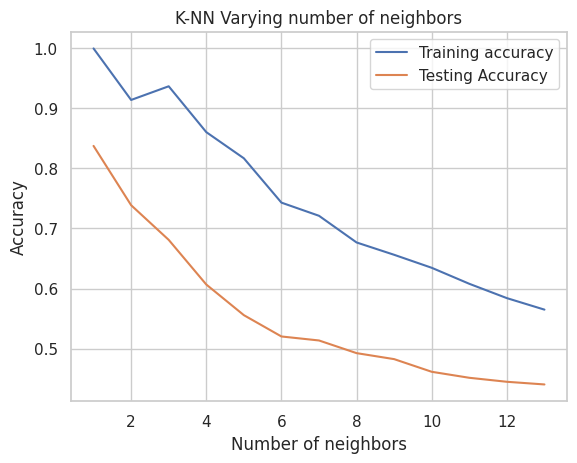

In [41]:
neighbors = np.arange(1,14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn = model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [43]:
print('Accuracy of K-Nearest Neighbor Model: ', accuracy_score(y_test, y_pred_knn))

Accuracy of K-Nearest Neighbor Model:  0.6810631229235881


In [44]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(f'Confusion Matrix:\n{conf_matrix}')
print(classification_report(y_test,y_pred_knn,zero_division=1))

Confusion Matrix:
[[  6   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0
    0]
 [  0  25   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   3
    0]
 [  0   0  20   0   0   0   0   0   0   0   3   0   0   0   1   0   0   0
    0]
 [  0   0   1  13   0   0   0   0   0   0   2   0   0   0   2   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  78   0   0   0   0   0   0   0   0   0   1   0  11
    0]
 [  0   1   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  20   0   0   0   0   0   0   0   0   0   3
    0]
 [  0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   5
    0]
 [  0   2   0   0   0   0   0   0   0  15   0   0   0   0   0   5   0   0
    0]
 [  0   2   9   2   0   0   0   0   4   0  89   0   0   5  15   1   0   7
    0]
 [  1   0   0   0   0   0   0   0   0   0   0   6   2   0   0   0   0   1
    3]
 [  2   0 

CLASSIFICATION MODEL: Gradient Boosting

In [45]:
model_GB = GradientBoostingClassifier()
model_GB = model_GB.fit(X_train, y_train)
y_pred_GB = model_GB.predict(X_test)

In [46]:
print('Accuracy of Gradient Boosting: ', accuracy_score(y_test, y_pred_GB))

Accuracy of Gradient Boosting:  0.6600221483942414


In [47]:
conf_matrix = confusion_matrix(y_test, y_pred_GB)
print(f'Confusion Matrix:\n{conf_matrix}')
print(classification_report(y_test, y_pred_GB,zero_division=1))

Confusion Matrix:
[[  9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   9   0   0   0   0   0   0   0   0   0   0   0   0   0   5   0  15
    0]
 [  0   0  23   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0]
 [  0   0   0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  76   0   0   0   0   0   0   0   0   0   0   0  14
    0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  22   0   0   0   0   0   0   0   0   0   1
    0]
 [  0   0   0   0   0   0   0   0  10   0   0   0   0   0   0   0   0   0
    0]
 [  0   2   0   0   0   0   0   0   0  15   0   0   0   0   0   5   0   0
    0]
 [  0   0   8   0   0   1   0   0   0   0  72   0   0  13   9   5   0  26
    0]
 [  1   0   0   0   0   0   0   0   0   0   0   8   0   0   0   0   0   3
    1]
 [  0   0 

CLASSIFICATION MODEL: DecisionTree

In [48]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

In [49]:
print('Accuracy of Decision Tree: ', accuracy_score(y_test, y_pred_DT))

Accuracy of Decision Tree:  0.946843853820598


In [50]:
conf_matrix = confusion_matrix(y_test, y_pred_DT)
print(f'Confusion Matrix:\n{conf_matrix}')
print(classification_report(y_test, y_pred_DT,zero_division=1))

Confusion Matrix:
[[  9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  27   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  86   0   0   0   0   0   0   0   0   0   2   0   2   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  23   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  19   0   0   0   0   0   3   0   0   0]
 [  0   0   1   0   0   0   0   0   0 130   0   0   1   1   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0  13   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 117   0   4   0   1   0]
 [  0  

CLASSIFICATION MODEL: RandomForest

In [51]:
model_RF = RandomForestClassifier(random_state=42)
model_RF = model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [52]:
print('Accuracy of Random forest: ', accuracy_score(y_test, y_pred_RF))

Accuracy of Random forest:  0.9479512735326688


In [53]:
conf_matrix = confusion_matrix(y_test, y_pred_RF)
print(classification_report(y_test, y_pred_RF,zero_division=1))

                        precision    recall  f1-score   support

          10:10:10 NPK       1.00      1.00      1.00         9
          10:26:26 NPK       0.91      1.00      0.95        29
          12:32:16 NPK       0.89      1.00      0.94        24
          13:32:26 NPK       1.00      1.00      1.00        18
          19:19:19 NPK       0.96      0.97      0.96        90
          20:20:20 NPK       1.00      1.00      1.00         2
          50:26:26 NPK       0.92      1.00      0.96        23
     Ammonium Sulphate       1.00      1.00      1.00        10
Chilated Micronutrient       0.87      0.91      0.89        22
                   DAP       0.98      0.95      0.96       134
      Ferrous Sulphate       1.00      0.92      0.96        13
         Hydrated Lime       1.00      1.00      1.00         4
                   MOP       0.93      0.94      0.94       122
    Magnesium Sulphate       0.98      1.00      0.99        43
                   SSP       0.96      

In [54]:
print("Model\t\t\tAccuracy of the model")
print("""Support Vector Machines\t\t {:.5f}""".format( accuracy_score(y_test, y_pred_svm)))
print("""K-Nearest Neighbors\t\t {:.5f}""".format( accuracy_score(y_test, y_pred_knn)))
print("""Gradient Boosting\t\t {:.5f}""".format( accuracy_score(y_test, y_pred_GB)))
print("""Decision Tree\t\t\t {:.5f}""".format(accuracy_score(y_test, y_pred_DT)))
print("""Random Forest\t\t\t {:.5f}""".format(accuracy_score(y_test, y_pred_RF)))

Model			Accuracy of the model
Support Vector Machines		 0.45293
K-Nearest Neighbors		 0.68106
Gradient Boosting		 0.66002
Decision Tree			 0.94684
Random Forest			 0.94795


Here we are considering Random Forest model and creating the interface by using gradio.


In [55]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 11.7 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl s

In [56]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
def predict_fertilizer(Soil_color, Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature):
    input_data = pd.DataFrame({
      'Soil_color' : [Soil_color],
      'Nitrogen' : [Nitrogen],
      'Phosphorus' : [Phosphorus],
      'Potassium' : [Potassium],
      'pH' : [pH],
      'Rainfall' : [Rainfall],
      "Temperature" : [Temperature]
    })
    predicted_fertilizer = model_RF.predict(X)[0]
    return [predicted_fertilizer]  # Wrap the output in a list

interface = gr.Interface(
    fn=predict_fertilizer,
    inputs=[
        gr.Textbox(lines=1,label="Soil_color"),
        gr.Number(label="Nitrogen"),
        gr.Number(label="Phosphorus"),
        gr.Number(label="Potassium"),
        gr.Number(label="pH"),
        gr.Number(label="Rainfall"),
        gr.Number(label="Temperature"),
    ],
    outputs=gr.Textbox(lines=1,label="Fertilizer"),
    title="Fertilizer Prediction",
    description="Predict the recommended fertilizer based on input features."
)

In [57]:
interface.launch(debug = True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1ab8210f29df39ca57.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1ab8210f29df39ca57.gradio.live
